# Modeling 
***

## Some info on dataframes from [Spotify API website](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features)

### Content
The "data.csv" file contains more than 170.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

### Primary:
- id 
    - Id of track generated by Spotify
### Numerical:
- acousticness (Ranges from 0 to 1): The positiveness of the track
    - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability (Ranges from 0 to 1)
    - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy (Ranges from 0 to 1)
    - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- duration_ms (Integer typically ranging from 200k to 300k)
    - The duration of the track in milliseconds.
- instrumentalness (Ranges from 0 to 1)
    - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- valence (Ranges from 0 to 1)
    - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- popularity (Ranges from 0 to 100)
    - The popularity of the album. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated from the popularity of the album’s individual tracks.
- tempo (Float typically ranging from 50 to 150)
    - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- liveness (Ranges from 0 to 1)
    - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness (Float typically ranging from -60 to 0)
    - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness (Ranges from 0 to 1)
    - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- year 
    - Ranges from 1921 to 2020
### Dummy:
- mode (0 = Minor, 1 = Major)
    - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11
    - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- artists (List of artists mentioned)
    - The artists of the album. Each artist object includes a link in href to more detailed information about the artist.
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.
- name 
    - The name of the album. In case of an album takedown, the value may be an empty string.

In [2]:
# Import necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from matplotlib import dates

In [3]:
# Load dataset and ceate pd dataframes
df = pd.read_csv('../DATA/data.csv', index_col='year', parse_dates=True)
df.head()

,valence,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
year,,,,,,,,,,,,,,,,,,
1921-01-01,0.0594,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1921-01-01,0.9630,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
1921-01-01,0.0394,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
1921-01-01,0.1650,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
1921-01-01,0.2530,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df = df.resample('A').mean()

In [5]:
df.index

DatetimeIndex(['1921-12-31', '1922-12-31', '1923-12-31', '1924-12-31',
               '1925-12-31', '1926-12-31', '1927-12-31', '1928-12-31',
               '1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
               '1957-12-31', '1958-12-31', '1959-12-31', '1960-12-31',
               '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
      

In [6]:
df.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
year,,,,,,,,,,,,,,
1921-12-31,0.379327,0.886896,0.418597,260537.166667,0.231815,0.046667,0.344878,5.093333,0.205710,-17.048667,0.673333,0.653333,0.073662,101.531493
1922-12-31,0.535549,0.938592,0.482042,165469.746479,0.237815,0.000000,0.434195,5.267606,0.240720,-19.275282,0.633803,0.140845,0.116655,100.884521
1923-12-31,0.625492,0.957247,0.577341,177942.362162,0.262406,0.000000,0.371733,4.810811,0.227462,-14.129211,0.789189,5.389189,0.093949,114.010730
1924-12-31,0.663725,0.940200,0.549894,191046.707627,0.344347,0.000000,0.581701,5.648305,0.235219,-14.231343,0.754237,0.661017,0.092089,120.689572
1925-12-31,0.621929,0.962607,0.573863,184986.924460,0.278594,0.000000,0.418297,5.107914,0.237668,-14.146414,0.730216,2.604317,0.111918,115.521921


In [7]:
df.tail()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
year,,,,,,,,,,,,,,
2016-12-31,0.431532,0.284171,0.600202,221396.510295,0.592855,0.309961,0.093984,5.139121,0.181170,-8.061056,0.646077,59.647190,0.104313,118.652630
2017-12-31,0.416476,0.286099,0.612217,211115.696787,0.590421,0.338353,0.097091,5.122490,0.191713,-8.312630,0.623996,63.263554,0.110536,117.202740
2018-12-31,0.447921,0.267633,0.663500,206001.007133,0.602435,0.427960,0.054217,5.353780,0.176326,-7.168785,0.611983,63.296243,0.127176,121.922308
2019-12-31,0.458818,0.278299,0.644814,201024.788096,0.593224,0.398666,0.077640,5.142637,0.172616,-7.722192,0.619805,65.256542,0.121043,120.235644
2020-12-31,0.501048,0.219931,0.692904,193728.397537,0.631232,0.495567,0.016376,5.314286,0.178535,-6.595067,0.581281,64.301970,0.141384,124.283129


In [8]:
df.index.unique()

DatetimeIndex(['1921-12-31', '1922-12-31', '1923-12-31', '1924-12-31',
               '1925-12-31', '1926-12-31', '1927-12-31', '1928-12-31',
               '1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
               '1957-12-31', '1958-12-31', '1959-12-31', '1960-12-31',
               '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
      

In [9]:
# Remove unnecessary columns
df = df.drop(labels = ['mode'], axis=1)
df.shape



## less rows.. is that an issue?

(100, 13)

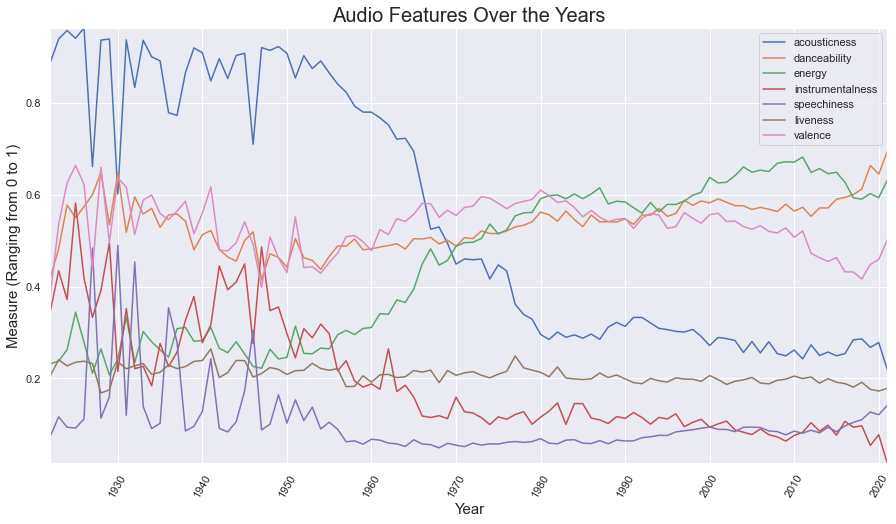

In [10]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid") 
columns = ["acousticness","danceability","energy","instrumentalness","speechiness","liveness","valence"]

for col in columns:
    x = df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col, palette=("Dark2"))
    
ax.set_title('Audio Features Over the Years', fontsize=20)
ax.set_ylabel('Measure (Ranging from 0 to 1)', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.show()

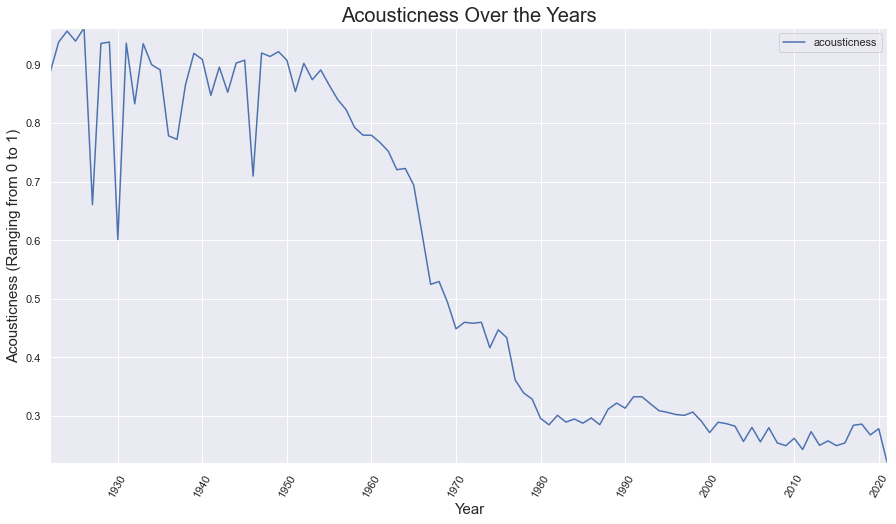

In [11]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid") 
columns = ["acousticness"]

for col in columns:
    x = df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col, palette=("Dark2"))
    
ax.set_title('Acousticness Over the Years', fontsize=20)
ax.set_ylabel('Acousticness (Ranging from 0 to 1)', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.show()

Acouticness has gone down over the years

## Predicting Acoustic Popularity

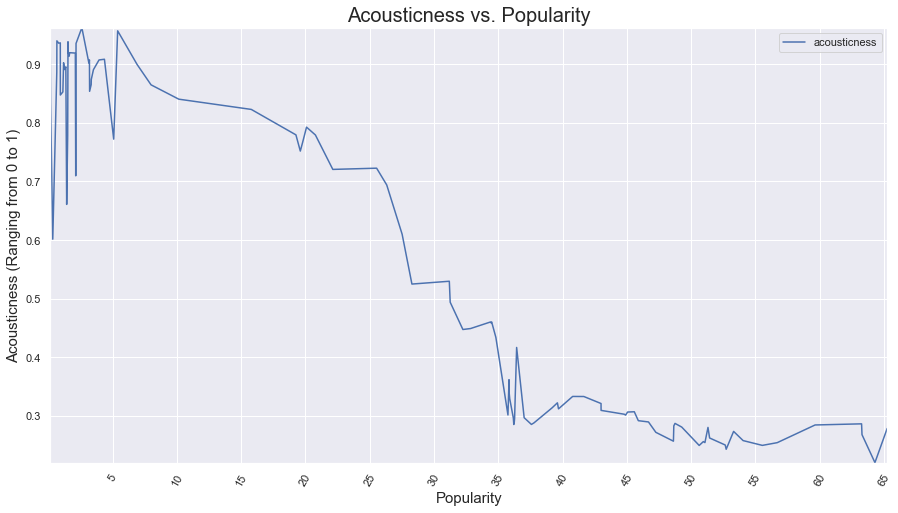

In [12]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid") 
columns = ["acousticness"]

for col in columns:
    x = df.groupby("popularity")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col, palette=("Dark2"))
    
ax.set_title('Acousticness vs. Popularity', fontsize=20)
ax.set_ylabel('Acousticness (Ranging from 0 to 1)', fontsize=15)
ax.set_xlabel('Popularity', fontsize=15)

plt.xticks(rotation = 60)
plt.xticks(np.arange(0, 100, 5))
plt.autoscale(tight=True)
plt.show()

## Linear Regression

In [25]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to build a statsmodels ols model
def build_sm_ols(df, features_to_use, target, add_constant=False, show_summary=True):
    X = df[features_to_use]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X).fit()
    if show_summary:
        print(ols.summary())
    return ols


# Check the validity of your model
# - Measure multicollinearity using vif of features
# - Test the normality of your residuals 
##  Ho: the variance is constant            
##  Ha: the variance is not constant


# assumptions of ols
# Check that residuals are normally distributed
def check_residuals_normal(ols):
    residuals = ols.resid
    t, p = scs.shapiro(residuals)
    if p <= 0.05:
        return False
    return True


# Check that residuals are equally spaced along the baseline (Homoscedasticity)
# Using the Breusch Pagan Test 
def check_residuals_homoskedasticity(ols):

    import statsmodels.stats.api as sms
    resid = ols.resid
    exog = ols.model.exog
    lg, p, f, fp = sms.het_breuschpagan(resid=resid, exog_het=exog)
    if p >= 0.05:
        return True
    return False



# Get the VIF score for use in multicollinearity check
def calculate_vif(df, features_to_use, target_feature):
    ols = build_sm_ols(df=df, features_to_use=features_to_use, target=target_feature, show_summary=False)
    r2 = ols.rsquared
    return 1 / (1 - r2)
    
    
    
# Check for multicollinearity in our feature space. 
def check_vif_feature_space(df, features_to_use, vif_threshold=3.0):
    all_good_vif = True
    for feature in features_to_use:
        target_feature = feature
        _features_to_use = [f for f in features_to_use if f!=target_feature]
        vif = calculate_vif(df=df, features_to_use=_features_to_use, target_feature=target_feature)
        if vif >= vif_threshold:
            print(f"{target_feature} surpassed threshold with vif={vif}")
            all_good_vif = False
    return all_good_vif


def check_model(df, 
                features_to_use, 
                target_col, 
                add_constant=False, 
                show_summary=False, 
                vif_threshold=3.0):
    has_multicollinearity = check_vif_feature_space(df=df, 
                                                    features_to_use=features_to_use, 
                                                    vif_threshold=vif_threshold)
    if not has_multicollinearity:
        print("Model contains multicollinear features")
    
    # build model 
    ols = build_sm_ols(df=df, features_to_use=features_to_use, 
                       target=target_col, add_constant=add_constant, 
                       show_summary=show_summary)
    
    # check residuals
    resids_are_norm = check_residuals_normal(ols)
    resids_are_homo = check_residuals_homoskedasticity(ols)
    
    if not resids_are_norm:
        print("Residuals failed normality test using Shaprio Test")
    if not resids_are_homo:
        print("Residuals failed homoskedasticity test using the Breusch Pagan Test")
    return ols



def normalize(feature):
    return (feature - feature.mean()) / feature.std()



def plot_residuals(ols):
    residuals = ols.resid
    plt.figure(figsize=(8,5))
    plt.title('Residuals Distribution')
    sns.distplot(residuals)
    plt.show()
    plt.figure()
    x_axis = np.linspace(0, 1, len(residuals))
    plt.scatter(x_axis, residuals)
    plt.title('Residuals and Baseline')
    plt.show()

In [28]:
features = list(df.drop('popularity', axis=1))

In [29]:
print(features)

['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo']


In [32]:
model = check_model(df=df, features_to_use=features, target_col='popularity', show_summary=True)

valence surpassed threshold with vif=240.24839374862583
acousticness surpassed threshold with vif=210.8574282804959
danceability surpassed threshold with vif=922.5734238413283
duration_ms surpassed threshold with vif=215.64696989780953
energy surpassed threshold with vif=745.2528953438665
explicit surpassed threshold with vif=9.334837701257078
instrumentalness surpassed threshold with vif=20.827217975784926
key surpassed threshold with vif=982.3196894834665
liveness surpassed threshold with vif=354.9867452319898
loudness surpassed threshold with vif=207.54737001655377
speechiness surpassed threshold with vif=15.70995553355868
tempo surpassed threshold with vif=2776.601663819586
Model contains multicollinear features
                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:   

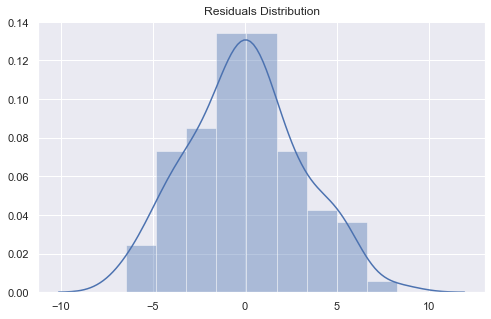

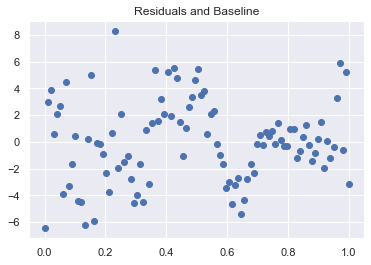

In [33]:
plot_residuals(model)

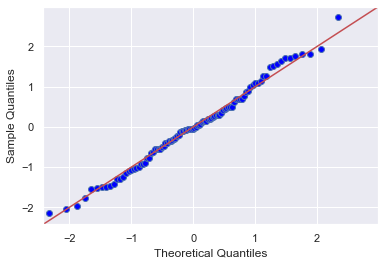

In [34]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)

### Logisitic Regression

In [13]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# splitting data into training-testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
# normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

ValueError: Unknown label type: 'continuous'